In [67]:
import warnings
warnings.filterwarnings('ignore')

import os 
import gc
from tqdm import tqdm
import spacy
import numpy as np
import pandas as pd 
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from string import punctuation
from pandarallel import pandarallel

In [2]:
pandarallel.initialize()
tokenizer = spacy.load('en_core_web_sm')
tokenizer_german = spacy.load('de_core_news_sm')

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [3]:
def read_data(path, name):
    data = open(path).read().strip().split('\n')
    df = pd.DataFrame(data, columns={name + ' Sentences'}).sample(frac=0.01).reset_index(drop=True)
    del data
    gc.collect()
    return df, name

In [4]:
def sentence_len(df):
    df['sentence_len'] = df['English Sentences'].parallel_apply(lambda x: len(x))
    plt.hist(df.sentence_len)
    plt.xlabel('Length of Sentences')
    plt.ylabel('Number of Sentences')
    plt.title('LENGTH PER SENTENCE HISTOGRAM')
    plt.show()
    

In [83]:
def most_common_word(df):
    x = []
    sentences = df['English Sentences'].values
    for sentence in tqdm(sentences, total=len(sentences)):
        for word in tokenizer(sentence.lower()):
            if word.is_stop == False:
                print(word)
                x.append(word)
    fdist = nltk.FreqDist(x)
    fdist.plot(25, cumulative=False)

In [6]:
def mean_word_utils(sentence):
    total_word_len = 0 
    num_words = 0
    for word in tokenizer(sentence):
        total_word_len += len(word)
        num_words += 1
    return int(total_word_len)/num_words
        

def mean_word_len(df):
    df['mean_word_len'] = df['English Sentences'].parallel_apply(mean_word_utils)
    plt.hist(df['mean_word_len'])
    plt.xlabel('Mean_Words_Count')
    plt.ylabel('Number of Sentences')
    plt.title('MEAN_WORD_LEN PER SENTENCE HISTOGRAM')
    plt.show()

In [7]:
def punc_utils(sentence):
    n=0
    for word in sentence:
        if word in punctuation:
            n += 1
    return n

def punctuation_count(df):
    df['punctuation_count'] = df['English Sentences'].parallel_apply(punc_utils)
    plt.hist(df['punctuation_count'])
    plt.xlabel('Number of punctuations')
    plt.ylabel('Number of Sentences')
    plt.title('PUNCTUATION PER SENTENCE HISTOGRAM')
    plt.show()

In [8]:
def char_utils(sentence):
    n = 0
    for word in sentence:
        if word.isalpha():
            n += 1
    return n

def number_of_char(df):
    df['char_counts'] = df['English Sentences'].parallel_apply(char_utils)
    plt.hist(df['char_counts'])
    plt.xlabel('Number of characters')
    plt.ylabel('Number of Sentences')
    plt.title('CHARACTER COUNTS PER SENTENCE HISTOGRAM')
    plt.show()

In [9]:
def stopwords_utils(sentence):
    n = 0
    for word in tokenizer(sentence):
        if word.is_stop == True:
            n += 1
    return n 

def stopwords_counts(sentence):
    df['stopword_counts'] =  df['English Sentences'].parallel_apply(stopwords_utils)
    plt.hist(df['stopword_counts'])
    plt.xlabel('Number of Stopwords')
    plt.ylabel('Number of Sentences')
    plt.title('STOPWORDS PER SENTENCE HISTOGRAM')
    plt.show()

In [10]:
path = '../input/train.en'
path_german = '../input/train.de'
df, name = read_data(path, 'English')

In [11]:
df.shape

(44688, 1)

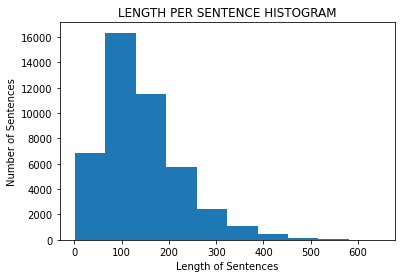

In [12]:
sentence_len(df)

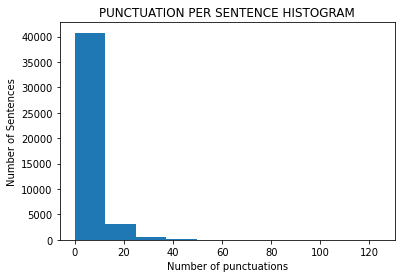

In [13]:
punctuation_count(df)

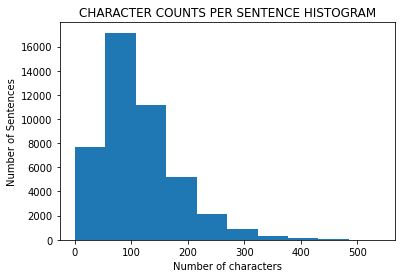

In [14]:
number_of_char(df)

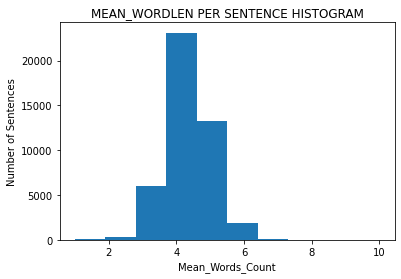

In [15]:
mean_word_len(df)

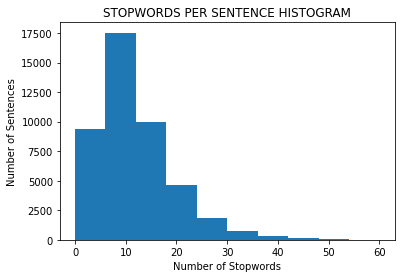

In [16]:
stopwords_counts(df)


100%|██████████| 44688/44688 [04:36<00:00, 161.67it/s]


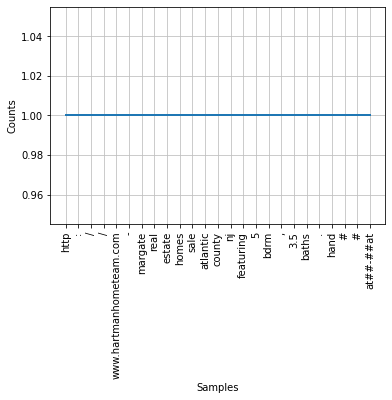

In [78]:
most_common_word(df)

In [85]:
x = []
for i in range(10):
    x.append(i)

In [86]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [89]:
x.append(10)

In [90]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10]